In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
#print 'compilation time : ', time.time() - start

In [11]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=20,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/20
3523/3523 [==============================] - 6s - loss: 4.9053e-04 - val_loss: 4.2360e-04
Epoch 2/20
3523/3523 [==============================] - 6s - loss: 3.6435e-04 - val_loss: 3.5335e-04
Epoch 3/20
3523/3523 [==============================] - 6s - loss: 4.0195e-04 - val_loss: 3.3818e-04
Epoch 4/20
3523/3523 [==============================] - 6s - loss: 3.5428e-04 - val_loss: 3.4340e-04
Epoch 5/20
3523/3523 [==============================] - 6s - loss: 3.4545e-04 - val_loss: 4.4962e-04
Epoch 6/20
3523/3523 [==============================] - 6s - loss: 3.9071e-04 - val_loss: 2.7460e-04
Epoch 7/20
3523/3523 [==============================] - 6s - loss: 3.1920e-04 - val_loss: 3.1907e-04
Epoch 8/20
3523/3523 [==============================] - 6s - loss: 3.5763e-04 - val_loss: 2.7192e-04
Epoch 9/20
3523/3523 [==============================] - 6s - loss: 3.2349e-04 - val_loss: 2.6603e-04
Epoch 10/20
3523/3523 [=====================

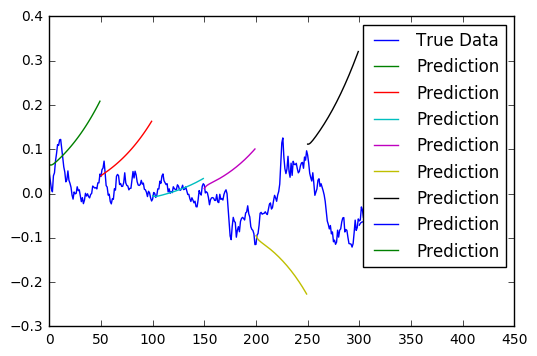

In [10]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

In [17]:
int(84/50)


1